# CS-141 Homework 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.patches import Ellipse

%load_ext autoreload
%autoreload 2
%autosave 180

Autosaving every 180 seconds


In [2]:
def plot_ellipse(cov, center, t):
    """ 
    Plot an ellipse based on a covariance matrix in matplotlib
    Inputs: covariance matrix, center
    Outputs: plotted ellipse
    """
    eig_vals, eig_vect = np.linalg.eig(cov)
    # print("\n Eigenvalues \n",eig_vals)
    # print("\n Eigenvectors \n",eig_vect)

    # lamdax = eig_vals[0]
    # lamday = eig_vals[1]

    # Get smallest and largest eigenvectors/values
    max_ind = np.argmax(eig_vals) # USE ABSOLUTE VALUE?
    # print("\n Max eig value indice =", max_ind)
    max_EV = eig_vect[:,max_ind]
    max_eval = np.max(eig_vals)
    min_eval = np.min(eig_vals)

    # Do we need these ??
    lamdax = eig_vals[0]
    lamday = eig_vals[1]

    if max_ind == 0:
        min_EV = eig_vect[:,1]
    else:
        min_EV = eig_vect[:,0]
    
    # print("\n Max eig vector = ", max_EV)
    # print("\n Min eig vector = ", min_EV)
    # print("\n Max eig val = ", max_eval)
    # print("\n Min eig val = ", min_eval)
    
    # Major and minor axes
    maj_len = 2*np.sqrt(lamdax)
    min_len = 2*np.sqrt(lamday)
    
    # Angle between x-axis and largest eigenvector
    angle = np.arctan2(max_EV[1], max_EV[0])
    if angle < 0: angle += 2*np.pi
    # print("\n Angle between x-axis and largest EV = ", angle)

    # Mean data coords
    center = center
    chi_sq = 1

    a = chi_sq * np.sqrt(max_eval)
    b = chi_sq * np.sqrt(min_eval)
    theta = np.linspace(0, 2*np.pi, 1000);
    pts_x = np.array(a * np.cos(theta))
    pts_y = np.array(b * np.sin(theta))
    pts_tot = np.vstack([pts_x, pts_y])
    # print(pts_tot)
    pts_tot = pts_tot.T

    # Rotation matrix 
    R = [[np.cos(angle), np.sin(angle)],[-np.sin(angle), np.cos(angle)]]
    # print(R)
    r_ellipse = pts_tot @ R
    # print(r_ellipse)

    plt.plot(r_ellipse[:,0] + center[0], r_ellipse[:,1] + center[1], label = t)

    # Define the ellipse
    # ellipse = Ellipse(center, r_ellipse[:,0], r_ellipse[:,1], angle=angle, edgecolor='blue', facecolor='none')
    # ax.add_patch(ellipse)

    return ax


 States from t=0 to t=5 
 [[ 0.          0.03117977  0.15397638 -0.24488477 -1.33741131 -2.16192597]
 [ 0.          0.06235953  0.18323369 -0.98095599 -1.20409707 -0.44493225]]

 Posterior over x and x_dot 
 [[ 0.    0.    0.25  0.5   2.5   2.    8.75  4.5  21.    8.   41.25 12.5 ]
 [ 0.    0.    0.5   1.    2.    2.    4.5   3.    8.    4.   12.5   5.  ]]

 Accelerations t=0 to t=5 
 [0, 0.06235953391070997, 0.1208741537020402, -1.1641896775194787, -0.22314108462598586, 0.7591648207977056]


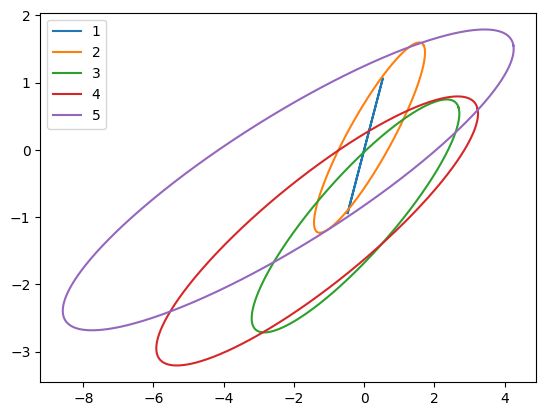

In [4]:
# Question 1.3: Implement state prediction step of Kalman filter

# Assume at t=0, pos, vel, and accel = 0
# Calculate state disrtibution for times t = 1,2,...,5

plt.figure()
ax = plt.gca()

# Time settings
dt = 1 # Assume delta t is 1 second
t_total = 5 # Total time in seconds
t_steps = int(t_total/dt) # Time steps 

# Initialize resting state 
x_0 = np.array([[0],[0]])
cov_0 = ([0, 0],[0, 0])


# Create a state vector for number of time steps t
states = [x_0]
posts = [cov_0]
accs = [0]

muh_a = 0 # avg accel
sigma_a = 1 

# State transition 
# Linear matrices A and B
A = np.array([[1, dt], [0, 1]])
B = np.array([[.5*dt**2], [dt]])
R = sigma_a * np.array([[.25, .5],[.5, 1]])
# print(R)

t = 0

for i in range(1, t_steps+1):
    # Random sample for accel using normal dist
    u_t = np.random.normal(muh_a, sigma_a, size=(1,1))
    accs.append(u_t.item())
    # State prediction 
    state_new = A @ states[-1] + B @ u_t
    # print(state_new)

    # Posterior 
    post_new = A @ posts[-1] @ A.T + R
    # print(post_new)

    ax = plot_ellipse(post_new, state_new, i)

    # Add state prediction and posterior 
    states.append(state_new)
    posts.append(post_new)

states = np.hstack(states)
posts = np.hstack(posts)

print("\n States from t=0 to t=5 \n",states)
print("\n Posterior over x and x_dot \n",posts)
print("\n Accelerations t=0 to t=5 \n",accs)


# Set the limits of the plot
# ax.set_xlim(-10, 10)
# ax.set_ylim(-10, 10)
# ax.set_aspect('equal')
plt.legend(loc="upper left")
plt.show()

# Part 2


 State before measurement at t=5 
 [[3.80384173]
 [2.18796674]]

 Posterior before measurement at t=5 
 [[41.25 12.5 ]
 [12.5   5.  ]]

 New state 
 [[8.99351744]
 [3.76059574]]

 New posterior 
 [[6.70050761 2.03045685]
 [2.03045685 1.82741117]]

 States from t=0 to t=5 
 [[ 0.         -0.14638185 -0.1344599   0.54449884  1.88750607  8.99351744]
 [ 0.         -0.2927637   0.3166076   1.04130988  1.64470458  3.76059574]]

 Posterior over x and x_dot 
 [[ 0.          0.          0.25        0.5         2.5         2.
   8.75        4.5        21.          8.          6.70050761  2.03045685]
 [ 0.          0.          0.5         1.          2.          2.
   4.5         3.          8.          4.          2.03045685  1.82741117]]

 Accelerations t=0 to t=5 
 [0, -0.29276369709967986, 0.6093712969857719, 0.7247022766263762, 0.6033947021478665, 0.5432621614576698]


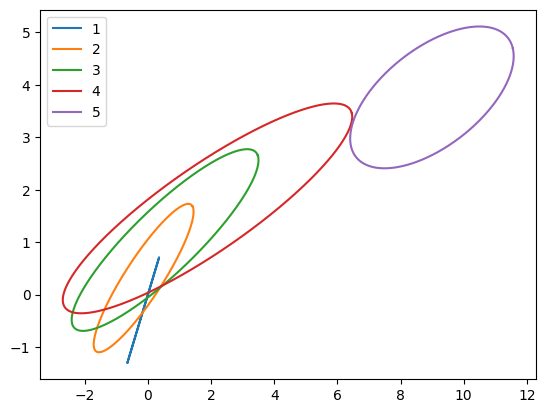

In [5]:
# Question 2.2: Implement measurement update 

# Assume at t=0, pos, vel, and accel = 0
# Calculate state disrtibution for times t = 1,2,...,5

plt.figure()
ax = plt.gca()

# Time settings
dt = 1 # Assume delta t is 1 second
t_total = 5 # Total time in seconds
t_steps = int(t_total/dt) # Time steps 

# Initialize resting state 
x_0 = np.array([[0],[0]])
cov_0 = ([0, 0],[0, 0])


# Create a state vector for number of time steps t
states = [x_0]
posts = [cov_0]
accs = [0]

muh_a = 0 # avg accel
sigma_a = 1 
sigma_pos = 8

# State transition 
# Linear matrices A and B
A = np.array([[1, dt], [0, 1]])
B = np.array([[.5*dt**2], [dt]])

# Implement C and Q matrices 
C = np.array([[1, 0]])
Q = np.array([[8]])

R = sigma_a * np.array([[.25, .5],[.5, 1]])
# print(R)

t = 0

for i in range(1, t_steps+1):
    # Random sample for accel using normal dist
    u_t = np.random.normal(muh_a, sigma_a, size=(1,1))
    accs.append(u_t.item())
    # State prediction 
    state_new_p = A @ states[-1] + B @ u_t
    # print(state_new)

    # Posterior 
    post_new_p = A @ posts[-1] @ A.T + R

    # IMPLEMENT MEASUREMENT - lines 4-6 KF
    if i == 5:
        print("\n State before measurement at t=5 \n", state_new_p)
        print("\n Posterior before measurement at t=5 \n", post_new_p)
        z_t = np.array([[10]])
        
        # Kalman gain 
        # tr = C @ post_new_p @ C.T + Q
        # print("\n checkpoint1 = ", tr)
        # print("\n checkpoint2 = ", np.linalg.inv(tr))
        K_t = post_new_p @ C.T @ np.linalg.inv(C @ post_new_p @ C.T + Q) 
        # print("\n Kalman gain \n",K_t)

        # State update
        # print("\n checkpoint1 = ", z_t - C @ state_new_p)
        # print("\n checkpoint2 = ", K_t@(z_t - C @ state_new_p))
        state_new = state_new_p + K_t @ (z_t - C @ state_new_p)
        print("\n New state \n", state_new)

        # Covariance update 
        post_new = (np.eye(2) - K_t @ C) @ post_new_p
        print("\n New posterior \n", post_new)
    else:
        # Add state prediction and posterior 
        state_new = state_new_p
        post_new = post_new_p

    
    states.append(state_new)
    posts.append(post_new)
        

    ax = plot_ellipse(post_new, state_new, i)

    

states = np.hstack(states)
posts = np.hstack(posts)

print("\n States from t=0 to t=5 \n",states)
print("\n Posterior over x and x_dot \n",posts)
print("\n Accelerations t=0 to t=5 \n",accs)


# # Set the limits of the plot
# # ax.set_xlim(-10, 10)
# # ax.set_ylim(-10, 10)
# # ax.set_aspect('equal')
plt.legend(loc="upper left")
plt.show()

False
False
False
False
False
False
True

 State before measurement 
 [[-12.63334236]
 [ -6.46196119]]

 Posterior before measurement 
 [[113.75  24.5 ]
 [ 24.5    7.  ]]

 Kalman gain 
 [[0.93429158]
 [0.20123203]]

 New state 
 [[ 8.51279886]
 [-1.9074077 ]]

 New posterior 
 [[7.47433265 1.60985626]
 [1.60985626 2.0698152 ]]
False
False
False
False
False
False
False
False
False
False
False
True

 State before measurement 
 [[-13.38517168]
 [  0.56105026]]

 Posterior before measurement 
 [[919.16427105  98.4476386 ]
 [ 98.4476386   14.0698152 ]]

 Kalman gain 
 [[0.99137154]
 [0.10618144]]

 New state 
 [[9.79822198]
 [3.04412149]]

 New posterior 
 [[7.93097232 0.84945153]
 [0.84945153 3.61650304]]
False

 States from t=0 to t=20 
 [[ 0.00000000e+00 -1.82325191e-02  1.75764713e-03 -4.88395988e-01
  -8.85726975e-01 -2.44609109e+00 -6.76993115e+00  8.51279886e+00
   6.37368239e+00  4.55388438e+00  2.76419575e+00  5.57588916e-02
  -2.43730252e+00 -4.45103548e+00 -6.83403796e+00 -8.952

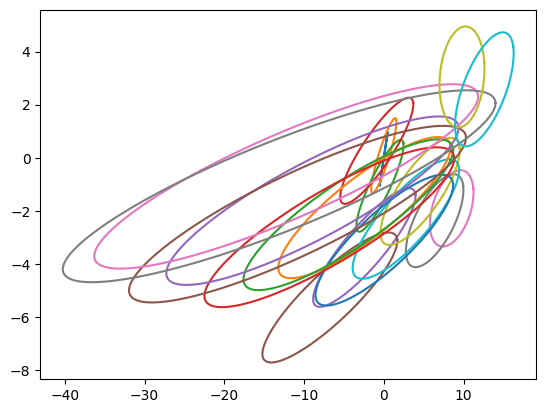

In [6]:
## Question 2.3: Implement sensor reading 

# Assume at t=0, pos, vel, and accel = 0
# Calculate state disrtibution for times t = 1,2,...,5

plt.figure()
ax = plt.gca()

# Time settings
dt = 1 # Assume delta t is 1 second
t_total = 20 # Total time in seconds
t_steps = int(t_total/dt) # Time steps 

# Initialize resting state 
x_0 = np.array([[0],[0]])
cov_0 = ([0, 0],[0, 0])


# Create a state vector for number of time steps t
states = [x_0]
posts = [cov_0]
accs = [0]

muh_a = 0 # avg accel
sigma_a = 1 
sigma_pos = 8
sensor_prob = 0.1 # 0.1, 0.5, OR 0.9

# State transition 
# Linear matrices A and B
A = np.array([[1, dt], [0, 1]])
B = np.array([[.5*dt**2], [dt]])

# Implement C and Q matrices 
C = np.array([[1, 0]])
Q = np.array([[8]])

R = sigma_a * np.array([[.25, .5],[.5, 1]])
# print(R)

t = 0

for i in range(1, t_steps+1):
    # Random sample for accel using normal dist
    u_t = np.random.normal(muh_a, sigma_a, size=(1,1))
    accs.append(u_t.item())
    # State prediction 
    state_new_p = A @ states[-1] + B @ u_t
    # print(state_new)

    # Posterior 
    post_new_p = A @ posts[-1] @ A.T + R

    # Include a sensor to randomly sample true position 
    z_t = np.array([[state_new[0,0]]])
    # print(z_t)
    result = np.random.choice([True, False], p=[sensor_prob, 1-sensor_prob])
    print(result)
    

    # IMPLEMENT MEASUREMENT - lines 4-6 KF
    if result == True:
        print("\n State before measurement \n", state_new_p)
        print("\n Posterior before measurement \n", post_new_p)
        z_t = np.array([[10]])
        
        # Kalman gain 
        # tr = C @ post_new_p @ C.T + Q
        # print("\n checkpoint1 = ", tr)
        # print("\n checkpoint2 = ", np.linalg.inv(tr))
        K_t = post_new_p @ C.T @ np.linalg.inv(C @ post_new_p @ C.T + Q) 
        print("\n Kalman gain \n",K_t)

        # State update
        # print("\n checkpoint1 = ", z_t - C @ state_new_p)
        # print("\n checkpoint2 = ", K_t@(z_t - C @ state_new_p))
        state_new = state_new_p + K_t @ (z_t - C @ state_new_p)
        print("\n New state \n", state_new)

        # Covariance update 
        post_new = (np.eye(2) - K_t @ C) @ post_new_p
        print("\n New posterior \n", post_new)
    else:
        # Add state prediction and posterior 
        state_new = state_new_p
        post_new = post_new_p

    
    states.append(state_new)
    posts.append(post_new)
        

    ax = plot_ellipse(post_new, state_new, i)

    

states = np.hstack(states)
posts = np.hstack(posts)

print("\n States from t=0 to t=20 \n",states)
print("\n Posterior over x and x_dot \n",posts)
print("\n Accelerations t=0 to t=20 \n",accs)


# # Set the limits of the plot
# # ax.set_xlim(-10, 10)
# # ax.set_ylim(-10, 10)
# # ax.set_aspect('equal')
# plt.legend(loc="upper left")
# plt.show()